## Imports

In [21]:
import networkx as nx
import random
from networkx.readwrite import json_graph
import json
import matplotlib.pyplot as plt

## Constants to create the graph

In [22]:
MATRIX_SIDE = 10
NO_FG_NODES = 20
COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
WEIGHT_BG_EDGES = 4
WEIGHT_FG_EDGES = 24
FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

In [23]:
# Create the background matrix of nodes
def create_background_matrix(matrix_side):
    G = nx.Graph()
    for i in range(matrix_side):
        for j in range(matrix_side):
            node_id = f"{i}-{j}"
            G.add_node(node_id, color=COLOR_BG, node_type="bg", pos=(i, j))
    return G

### Task 2

In [24]:
# Randomly select foreground nodes
def select_foreground_nodes(graph, no_fg_nodes, matrix_side):
    all_possible_nodes = [
        f"{i}-{j}" for i in range(1, matrix_side - 1) for j in range(1, matrix_side - 1)
    ]
    foreground_nodes = random.sample(all_possible_nodes, no_fg_nodes)
    for node in foreground_nodes:
        graph.nodes[node]["color"] = COLOR_FG
        graph.nodes[node]["node_type"] = "fg"
    return foreground_nodes

### Task 3

In [25]:
# Add edges to the graph
def add_edges(graph, matrix_side):
    for i in range(matrix_side):
        for j in range(matrix_side):
            node_id = f"{i}-{j}"
            node_type = graph.nodes[node_id]["node_type"]
            neighbors = [
                (i + dx, j + dy, dx, dy)
                for dx, dy in [
                    (0, 1), (1, 0), (0, -1), (-1, 0),  # Horizontal and vertical
                    (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonal
                ]
                if 0 <= i + dx < matrix_side and 0 <= j + dy < matrix_side
            ]
            for ni, nj, dx, dy in neighbors:
                neighbor_id = f"{ni}-{nj}"
                if graph.nodes[neighbor_id]["node_type"] == node_type:
                    # Check diagonal connections for background nodes only
                    if node_type == "bg" or (dx == 0 or dy == 0):
                        graph.add_edge(
                            node_id, neighbor_id,
                            weight=WEIGHT_BG_EDGES if node_type == "bg" else WEIGHT_FG_EDGES,
                            color=COLOR_BG if node_type == "bg" else COLOR_FG
                        )

## 2.2 Sub-activity: Graph manipulation and output


### Task 4

In [26]:
# Compute graph metrics
def compute_graph_metrics(graph):
    print(f"Number of nodes: {graph.number_of_nodes()}")
    print(f"Number of edges: {graph.number_of_edges()}")

    # Compute and print graph density
    density = nx.density(graph)
    print(f"Graph density: {density:.4f}")

    # Compute and print degree centrality
    degree_centrality = nx.degree_centrality(graph)
    print("Degree centrality (sample):")
    for node, centrality in list(degree_centrality.items())[:5]:  # Display only the first 5 nodes
        print(f"  Node {node}: {centrality:.4f}")

### Task 5


In [27]:
# Export graph to JSON
def export_graph_to_json(graph, file_name):
    data = json_graph.node_link_data(graph)
    with open(file_name, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Graph exported to {file_name}")

## Putting it all together

Number of nodes: 100
Number of edges: 210
Graph density: 0.0424
Degree centrality (sample):
  Node 0-0: 0.0303
  Node 0-1: 0.0404
  Node 0-2: 0.0404
  Node 0-3: 0.0404
  Node 0-4: 0.0505
Graph exported to graph.json


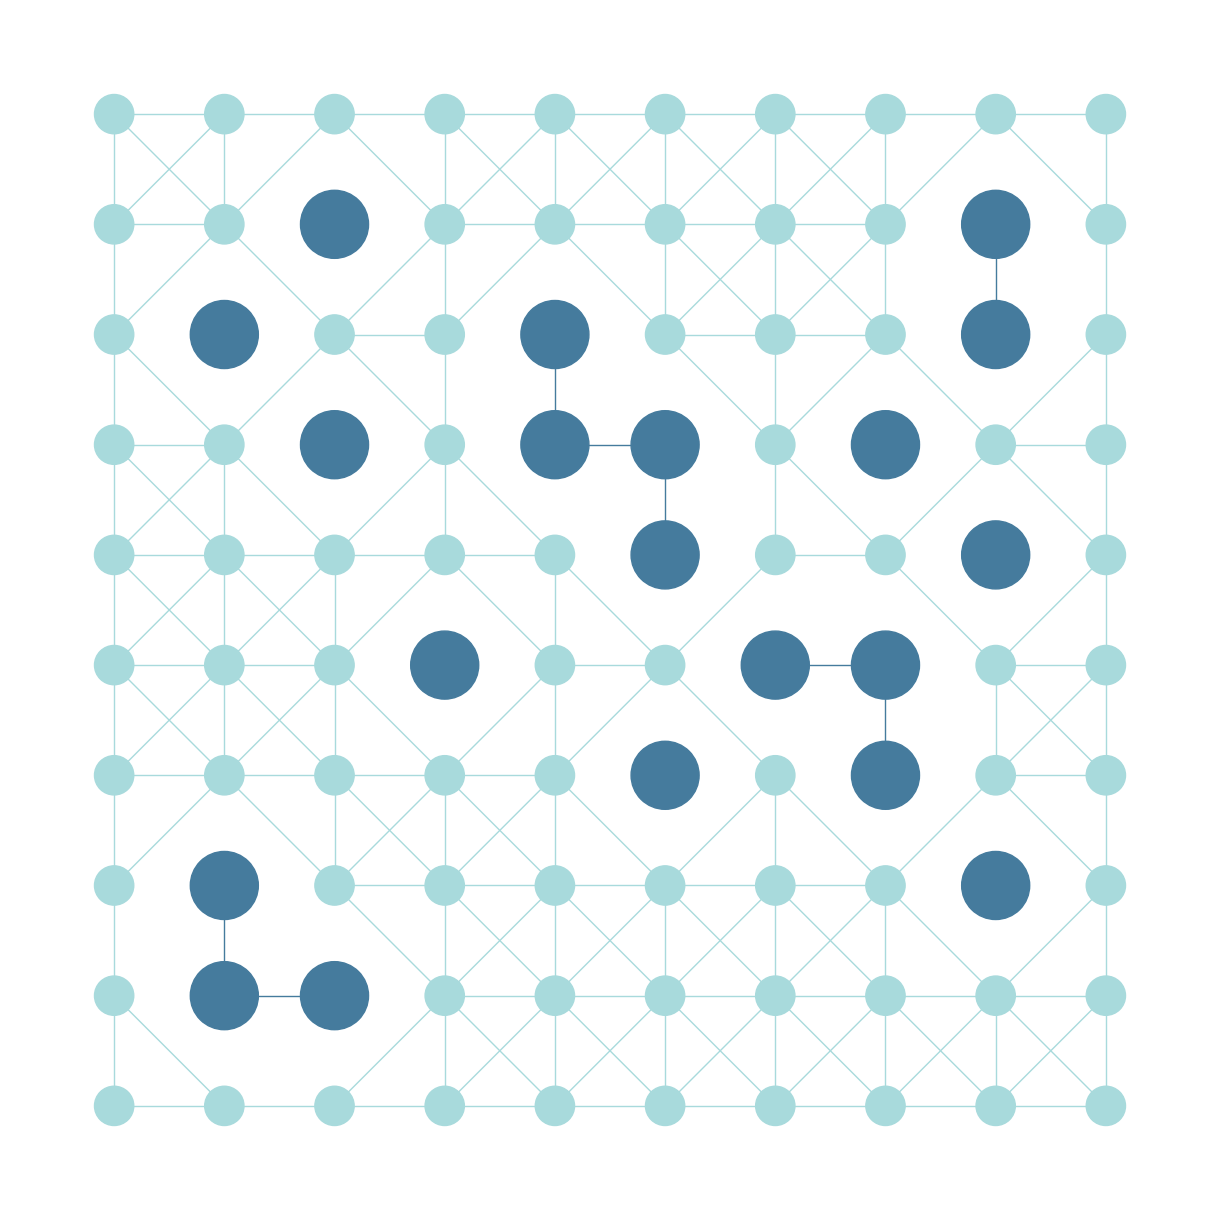

In [28]:
if __name__ == "__main__":
    # Create the background graph
    graph = create_background_matrix(MATRIX_SIDE)

    # Add foreground nodes
    fg_nodes = select_foreground_nodes(graph, NO_FG_NODES, MATRIX_SIDE)

    # Add edges
    add_edges(graph, MATRIX_SIDE)

    # Compute metrics
    compute_graph_metrics(graph)

    # Export to JSON
    export_graph_to_json(graph, "graph.json")

    # Visualization with grid layout
    pos = {node: (graph.nodes[node]["pos"][1], -graph.nodes[node]["pos"][0]) for node in graph.nodes}
    plt.figure(figsize=FIG_SIZE)
    nx.draw(
        graph, pos,
        node_color=[graph.nodes[node]["color"] for node in graph.nodes],
        edge_color=[graph.edges[edge]["color"] for edge in graph.edges],
        node_size=[SIZE_BG_NODES if graph.nodes[node]["node_type"] == "bg" else SIZE_FG_NODES for node in graph.nodes],
        with_labels=False,  # Turn off labels
        font_size=8
    )

    plt.show()
